In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [45]:
data = pd.read_csv("Burt Data.csv")

In [46]:
data.head(20)

,BAY,BAM,BTM,Gender,Score,RAY,RAM,RTM,D,RLD
0,5,0,60,F,2,5,3,63,3,Good
1,5,0,60,F,3,5,3,63,3,Good
2,5,0,60,F,4,5,4,64,4,Good
3,5,0,60,F,5,5,5,65,5,Good
4,5,0,60,F,6,5,5,65,5,Good
5,5,0,60,F,7,5,6,66,6,Well
6,5,0,60,F,8,5,6,66,6,Well
7,5,0,60,F,9,5,7,67,7,Well
8,5,0,60,F,10,5,7,67,7,Well
9,5,0,60,F,11,5,8,68,8,Well


In [4]:
data.shape

(39676, 10)

In [5]:
data = data.fillna(data.mean())

In [6]:
data.cov()

,BAY,BAM,BTM,Score,RAY,RAM,RTM,D
BAY,1.625041e+01,-7.335559e-16,1.950049e+02,0.000000e+00,-7.163632e-17,-2.937089e-17,-5.043197e-16,-195.004915
BAM,-7.335559e-16,1.144408e+01,1.144408e+01,2.750835e-16,-7.808359e-16,-2.201026e-16,1.421265e-15,-11.444075
BTM,1.950049e+02,1.144408e+01,2.351503e+03,-4.401335e-15,6.602003e-15,-2.249380e-16,-2.604123e-14,-2351.503055
Score,0.000000e+00,2.750835e-16,-4.401335e-15,9.900250e+02,8.537830e+01,-2.302810e+00,1.022237e+03,1022.236774
RAY,-7.163632e-17,-7.808359e-16,6.602003e-15,8.537830e+01,7.532384e+00,-1.140000e+00,8.924861e+01,89.248609
RAM,-2.937089e-17,-2.201026e-16,-2.249380e-16,-2.302810e+00,-1.140000e+00,1.157087e+01,-2.109135e+00,-2.109135
RTM,-5.043197e-16,1.421265e-15,-2.604123e-14,1.022237e+03,8.924861e+01,-2.109135e+00,1.068874e+03,1068.874175
D,-1.950049e+02,-1.144408e+01,-2.351503e+03,1.022237e+03,8.924861e+01,-2.109135e+00,1.068874e+03,3420.377230


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39676 entries, 0 to 39675
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BAY     39676 non-null  int64 
 1   BAM     39676 non-null  int64 
 2   BTM     39676 non-null  int64 
 3   Gender  39676 non-null  object
 4   Score   39676 non-null  int64 
 5   RAY     39676 non-null  int64 
 6   RAM     39676 non-null  int64 
 7   RTM     39676 non-null  int64 
 8   D       39676 non-null  int64 
 9   RLD     39676 non-null  object
dtypes: int64(8), object(2)
memory usage: 3.0+ MB


In [8]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(exclude="int64").columns
print(CateList)

Index(['Gender', 'RLD'], dtype='object')


In [9]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])

In [10]:
print(LE.classes_)

['Good' 'Mild' 'Neutral' 'Severe' 'Well']


In [11]:
data.head(30)

,BAY,BAM,BTM,Gender,Score,RAY,RAM,RTM,D,RLD
0,5,0,60,0,2,5,3,63,3,0
1,5,0,60,0,3,5,3,63,3,0
2,5,0,60,0,4,5,4,64,4,0
3,5,0,60,0,5,5,5,65,5,0
4,5,0,60,0,6,5,5,65,5,0
5,5,0,60,0,7,5,6,66,6,4
6,5,0,60,0,8,5,6,66,6,4
7,5,0,60,0,9,5,7,67,7,4
8,5,0,60,0,10,5,7,67,7,4
9,5,0,60,0,11,5,8,68,8,4


In [ ]:
data.describe()

,BAY,BAM,BTM,Gender,Score,RAY,RAM,RTM,D,RLD
count,39676.00000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000
mean,11.50000,5.307692,143.307692,0.500000,56.000000,8.697248,5.477064,109.844037,-33.463656,3.114679
std,4.03118,3.382909,48.492299,0.500006,31.464662,2.744519,3.401598,32.693641,58.483991,0.803148
min,5.00000,0.000000,60.000000,0.000000,2.000000,5.000000,0.000000,63.000000,-164.000000,0.000000
25%,8.00000,3.000000,101.000000,0.000000,29.000000,6.000000,3.000000,80.000000,-77.000000,3.000000
50%,11.50000,5.000000,143.500000,0.500000,56.000000,8.000000,6.000000,105.000000,-33.000000,3.000000
75%,15.00000,8.000000,185.000000,1.000000,83.000000,11.000000,9.000000,138.000000,9.000000,4.000000
max,18.00000,11.000000,227.000000,1.000000,110.000000,14.000000,11.000000,171.000000,111.000000,4.000000


In [ ]:
data.cov()

,BAY,BAM,BTM,Gender,Score,RAY,RAM,RTM,D,RLD
BAY,1.625041e+01,-7.335559e-16,1.950049e+02,0.000000e+00,0.000000e+00,-7.163632e-17,-2.937089e-17,-5.043197e-16,-1.950049e+02,-6.709263e-01
BAM,-7.335559e-16,1.144408e+01,1.144408e+01,-3.725089e-17,2.750835e-16,-7.808359e-16,-2.201026e-16,1.421265e-15,-1.144408e+01,-6.149968e-02
BTM,1.950049e+02,1.144408e+01,2.351503e+03,1.604654e-15,-4.401335e-15,6.602003e-15,-2.249380e-16,-2.604123e-14,-2.351503e+03,-8.112615e+00
Gender,0.000000e+00,-3.725089e-17,1.604654e-15,2.500063e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.355488e-15,1.567044e-17
Score,0.000000e+00,2.750835e-16,-4.401335e-15,0.000000e+00,9.900250e+02,8.537830e+01,-2.302810e+00,1.022237e+03,1.022237e+03,6.046780e+00
RAY,-7.163632e-17,-7.808359e-16,6.602003e-15,0.000000e+00,8.537830e+01,7.532384e+00,-1.140000e+00,8.924861e+01,8.924861e+01,5.286836e-01
RAM,-2.937089e-17,-2.201026e-16,-2.249380e-16,0.000000e+00,-2.302810e+00,-1.140000e+00,1.157087e+01,-2.109135e+00,-2.109135e+00,-1.231612e-02
RTM,-5.043197e-16,1.421265e-15,-2.604123e-14,0.000000e+00,1.022237e+03,8.924861e+01,-2.109135e+00,1.068874e+03,1.068874e+03,6.331887e+00
D,-1.950049e+02,-1.144408e+01,-2.351503e+03,4.355488e-15,1.022237e+03,8.924861e+01,-2.109135e+00,1.068874e+03,3.420377e+03,1.444450e+01
RLD,-6.709263e-01,-6.149968e-02,-8.112615e+00,1.567044e-17,6.046780e+00,5.286836e-01,-1.231612e-02,6.331887e+00,1.444450e+01,6.450463e-01


In [ ]:
corr = data.corr()

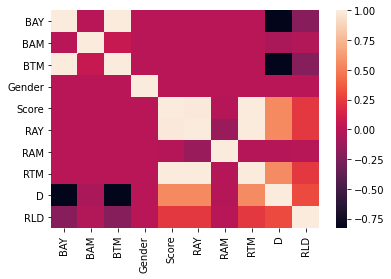

In [ ]:
sns.heatmap(corr)

In [ ]:
import sympy 

In [ ]:
reduced_form, inds = sympy.Matrix(data.values).rref()
reduced_form

Matrix([
[1, 0, 12, 0, 0, 0, 0,  0, -12, 0],
[0, 1,  1, 0, 0, 0, 0,  0,  -1, 0],
[0, 0,  0, 1, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 1, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 1, 0, 12,  12, 0],
[0, 0,  0, 0, 0, 0, 1,  1,   1, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 1],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0,

In [ ]:
inds

(0, 1, 3, 4, 5, 6, 9)

In [ ]:
inds = list(inds)
inds

[0, 1, 3, 4, 5, 6, 9]

In [ ]:
for i in range(10):
    if(i not in inds):
        print(data.columns[i])

BTM
RTM
D


In [ ]:
data = data.drop(['BTM','RTM','D'], axis = 1) 

In [ ]:
data.head(20)

,BAY,BAM,Gender,Score,RAY,RAM,RLD
0,5,0,0,2,5,3,0
1,5,0,0,3,5,3,0
2,5,0,0,4,5,4,0
3,5,0,0,5,5,5,0
4,5,0,0,6,5,5,0
5,5,0,0,7,5,6,4
6,5,0,0,8,5,6,4
7,5,0,0,9,5,7,4
8,5,0,0,10,5,7,4
9,5,0,0,11,5,8,4


In [ ]:
data.cov()

,BAY,BAM,Gender,Score,RAY,RAM,RLD
BAY,1.625041e+01,-7.335559e-16,0.000000e+00,0.000000e+00,-7.163632e-17,-2.937089e-17,-6.709263e-01
BAM,-7.335559e-16,1.144408e+01,-3.725089e-17,2.750835e-16,-7.808359e-16,-2.201026e-16,-6.149968e-02
Gender,0.000000e+00,-3.725089e-17,2.500063e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.567044e-17
Score,0.000000e+00,2.750835e-16,0.000000e+00,9.900250e+02,8.537830e+01,-2.302810e+00,6.046780e+00
RAY,-7.163632e-17,-7.808359e-16,0.000000e+00,8.537830e+01,7.532384e+00,-1.140000e+00,5.286836e-01
RAM,-2.937089e-17,-2.201026e-16,0.000000e+00,-2.302810e+00,-1.140000e+00,1.157087e+01,-1.231612e-02
RLD,-6.709263e-01,-6.149968e-02,1.567044e-17,6.046780e+00,5.286836e-01,-1.231612e-02,6.450463e-01


In [ ]:
data.cov()

,BAY,BAM,Gender,Score,RAY,RAM,RLD
BAY,1.625041e+01,-7.335559e-16,0.000000e+00,0.000000e+00,-7.163632e-17,-2.937089e-17,-6.709263e-01
BAM,-7.335559e-16,1.144408e+01,-3.725089e-17,2.750835e-16,-7.808359e-16,-2.201026e-16,-6.149968e-02
Gender,0.000000e+00,-3.725089e-17,2.500063e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.567044e-17
Score,0.000000e+00,2.750835e-16,0.000000e+00,9.900250e+02,8.537830e+01,-2.302810e+00,6.046780e+00
RAY,-7.163632e-17,-7.808359e-16,0.000000e+00,8.537830e+01,7.532384e+00,-1.140000e+00,5.286836e-01
RAM,-2.937089e-17,-2.201026e-16,0.000000e+00,-2.302810e+00,-1.140000e+00,1.157087e+01,-1.231612e-02
RLD,-6.709263e-01,-6.149968e-02,1.567044e-17,6.046780e+00,5.286836e-01,-1.231612e-02,6.450463e-01


In [ ]:
data = data.drop(['Gender'], axis = 1) 

In [ ]:
data.head(20)

,BAY,BAM,Score,RAY,RAM,RLD
0,5,0,2,5,3,0
1,5,0,3,5,3,0
2,5,0,4,5,4,0
3,5,0,5,5,5,0
4,5,0,6,5,5,0
5,5,0,7,5,6,4
6,5,0,8,5,6,4
7,5,0,9,5,7,4
8,5,0,10,5,7,4
9,5,0,11,5,8,4


In [ ]:
corr = data.corr()

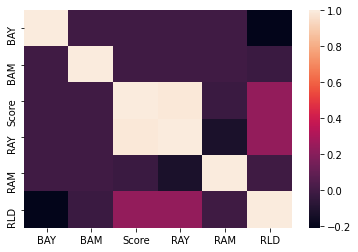

In [ ]:
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [ ]:
data.head()

,BAY,BAM,Score,RAM,RLD
0,5,0,2,3,0
1,5,0,3,3,0
2,5,0,4,4,0
3,5,0,5,5,0
4,5,0,6,5,0


In [12]:
data = data.drop(['BAY','BAM','Gender','RAY','RTM','D'], axis = 1) 

In [13]:
data.shape

(39676, 4)

In [14]:
data = data.drop_duplicates()

In [15]:
data.shape

(18312, 4)

In [16]:
data.head()

,BTM,Score,RAM,RLD
0,60,2,3,0
1,60,3,3,0
2,60,4,4,0
3,60,5,5,0
4,60,6,5,0


In [17]:
data = data.drop(['RAM'], axis = 1) 

In [18]:
data.head()

,BTM,Score,RLD
0,60,2,0
1,60,3,0
2,60,4,0
3,60,5,0
4,60,6,0


In [19]:
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,BTM,Score,RLD
0,209,51,3
1,75,19,1
2,131,100,4
3,159,105,4
4,89,78,4


In [20]:
X=data.drop(['RLD'],axis=1).values
y=data['RLD'].values
print(X.shape, y.shape)

(18312, 2) (18312,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [22]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(13734, 2) (13734,)
(4578, 2) (4578,)


In [23]:
from keras.utils import to_categorical

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y = to_categorical(y)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13734, 2) (13734, 5)
(4578, 2) (4578, 5)


In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [27]:
input_dim = X.shape[1]
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=input_dim))
model.add(Dense(25, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_3 (Dense)              (None, 75)                3825      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               7600      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 505       
Total params: 13,535
Trainable params: 13,535
Non-trainable params: 0
____________________________________________________

In [28]:
history = model.fit(X, y,
                    epochs=100,
                    verbose=True)

Epoch 1/100
573/573 [==============================] - 1s 1ms/step - loss: 0.3933 - accuracy: 0.8894
Epoch 2/100
573/573 [==============================] - 1s 1ms/step - loss: 0.2403 - accuracy: 0.9133
Epoch 3/100
573/573 [==============================] - 1s 1ms/step - loss: 0.1864 - accuracy: 0.9316
Epoch 4/100
573/573 [==============================] - 1s 1ms/step - loss: 0.1307 - accuracy: 0.9475
Epoch 5/100
573/573 [==============================] - 1s 1ms/step - loss: 0.1141 - accuracy: 0.9572
Epoch 6/100
573/573 [==============================] - 1s 1ms/step - loss: 0.0968 - accuracy: 0.9615
Epoch 7/100
573/573 [==============================] - 1s 1ms/step - loss: 0.0883 - accuracy: 0.9660
Epoch 8/100
573/573 [==============================] - 1s 1ms/step - loss: 0.0897 - accuracy: 0.9663
Epoch 9/100
573/573 [==============================] - 1s 1ms/step - loss: 0.0743 - accuracy: 0.9720
Epoch 10/100
573/573 [==============================] - 1s 1ms/step - loss: 0.0782 - accura

In [29]:
loss, accuracy = model.evaluate(X, y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9880


In [30]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    #val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    #val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc')
    #plt.plot(x, val_acc, 'r', label='Validation Acc')
    plt.title('Training Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    #plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training Loss')
    plt.legend()

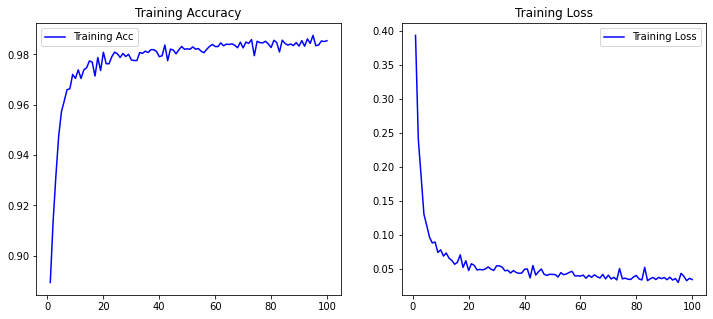

In [31]:
plot_history(history)

In [42]:
pred = model.predict([[75,19]])
classes = pred[0]
print(classes)
print(len(classes))
final=np.where(classes==max(classes))

[4.7525591e-03 8.9254308e-01 1.0236419e-01 3.4017180e-04 1.0503158e-11]
5


In [43]:
print(final)

(array([1]),)


In [44]:
if(final[0]==0):
    print("Good")
elif(final[0]==1):
    print("Mild")
elif(final[0]==2):
    print("Neutral")
elif(final[0]==3):
    print("Severe")
elif(final[0]==4):
    print("Well")    

Mild


In [35]:
from keras.models import model_from_json

In [36]:
model_json = model.to_json()

In [37]:
with open("burt.json", "w") as json_file:
    json_file.write(model_json)

In [38]:
model.save_weights("burt.h5")

In [39]:
json_file = open('burt.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("burt.h5")

In [40]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_3 (Dense)              (None, 75)                3825      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               7600      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 505       
Total params: 13,535
Trainable params: 13,535
Non-trainable params: 0
____________________________________________________

In [41]:
loss, accuracy = loaded_model.evaluate(X, y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9880


In [47]:
set = data.drop(['BAY',	'BAM'	,'BTM'	,'Gender','RAY',	'RAM','D',	'RLD'], axis=1)

In [48]:
set.head()

,Score,RTM
0,2,63
1,3,63
2,4,64
3,5,65
4,6,65


In [49]:
set = set.drop_duplicates()

In [50]:
set.shape

(109, 2)

In [68]:
input_dim = 1
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=input_dim))
model.add(Dense(25, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_16 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_17 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_18 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_19 (Dense)             (None, 125)               12625     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [69]:
history = model.fit(set['Score'], set['RTM'],
                    epochs=500,
                    verbose=True)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 12679.7256
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 11769.5342
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 10667.2412
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 8920.9873
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 6799.2568
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 3994.5576
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 1455.7999
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 772.0945
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 1629.4500
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 1068.8701
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 639.1849
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 796.4416
Epoch 13/500
4/4 [=======

In [82]:
pred = model.predict([[6]])

In [83]:
pred

array([[65.06306]], dtype=float32)

In [84]:
ans = pred[0][0]
ans = int(round(ans))
ans

65

In [87]:
model_json = model.to_json()
with open("burt1.json", "w") as json_file:
    json_file.write(model_json)

In [88]:
model.save_weights("burt1.h5")

In [89]:
json_file = open('burt1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("burt1.h5")

In [90]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_16 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_17 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_18 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_19 (Dense)             (None, 125)               12625     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [92]:
loaded_model.predict([[19]])

array([[72.88502]], dtype=float32)